<a href="https://colab.research.google.com/github/gemini106/KubernetesGoogle/blob/master/GRIP_Task1_SANA_SUBHEDAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Graduate Rotational Internship Program ( GRIP JULY 2021 )***
### (DataScience and Business Analytics)

### **Author : SANA SUBHEDAR**




## **TASK 1 :- Student Score Prediction Using Supervised ML**
Predicting a Students' Score based on hour of Study

### **1. Importing all the required Libraries**




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **2. Reading the data from URL**

In [10]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **3. Checking Data-type,Non-Null Values and shape**

In [13]:
df.shape

(25, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000



### In the dataset 25 student's, study hours and marks are already given, we have to predict the percentage of students based on no of hours the student studies. 

# **DATA VISUALIZATION**
### **4. Create Plots to check relationship between the Variables**

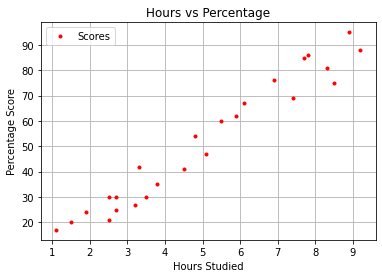

In [60]:
df.plot(x='Hours', y='Scores', style='r.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()


### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## **5. Preparing the data**

In [20]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### **6. Splitting the data into train and test**

In [21]:

from sklearn.model_selection import train_test_split                          #importing Libraries for train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### **7. Training the model using linear regression**

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### **8. Plotting on test data**

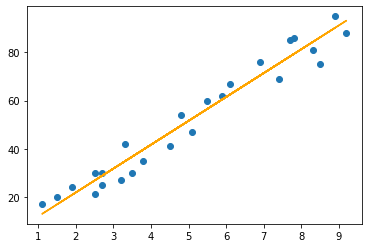

In [31]:
line = regressor.coef_*X+regressor.intercept_


plt.scatter(X, y)
plt.plot(X, line, color='orange');
plt.show()



### **9.Calculating the accuracy of the model on train set**

TRAIN SET SCORE
0.9515510725211553


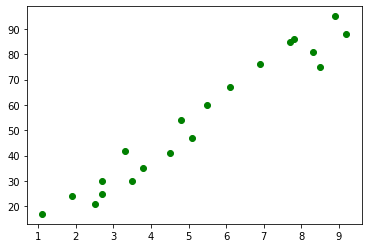

In [34]:
plt.scatter(X_train,y_train, color='green')
print("TRAIN SET SCORE")
print(regressor.score(X_train,y_train))

### **10. Calculating the accuracy of the model on test set**


TEST SET SCORE
0.9454906892105354


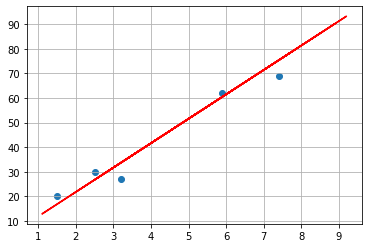

In [53]:
print("TEST SET SCORE")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="red")
plt.grid(True)
plt.show()

## From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.



### **11. Making Predictions**

In [36]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [37]:
# Comparing Actual vs Predicted

score_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
score_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **12. Checking the value of errors**


In [42]:
from sklearn import metrics

print('MEAN ABSOLUTE ERROR = ', metrics.mean_absolute_error(y_test, y_pred))
print('MEAN SQAURED ERROR = :', metrics.mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR = :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MEAN ABSOLUTE ERROR =  4.183859899002982
MEAN SQAURED ERROR = : 21.598769307217456
ROOT MEAN SQUARED ERROR = : 4.647447612100373


# ***Q] What will be predicted score if a student studies for 9.25 hrs/ day?***

## **13. Calculating predicted score of the model for 9.25 hours**

In [40]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No. of Study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Study Hours = 9.25
Predicted Score = 93.69173248737539


# Hence,If a student studies for 9.25 hours, then the predicted score is 94.69

### **14. Saving the model**

In [43]:
import joblib
joblib.dump(regressor,"GRIP_JULY21_TASK1.pckl")

['GRIP_JULY21_TASK1.pckl']

In [45]:
my_model= joblib.load("GRIP_JULY21_TASK1.pckl")